<div class="alert alert-block alert-danger">  
<h2><center><strong>Importing Python Libraries 📕 📗 📘 📙</strong></center></h2>
        
</div>

- Libraries are important and we call them to perform the different actions on our data and for training the models.
- Its a first step to load the library to perform the specific task

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report, confusion_matrix
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.cm as cm
from matplotlib import rcParams
from collections import Counter
from nltk.tokenize import RegexpTokenizer
import re
import string
from tensorflow.keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

<h4> We are uisng the following versions of the libraries:</h4>

- numpy == 1.18.5

- pandas == 1.1.3

- tensorflow ==1.7.0

- keras == 2.4.3

- nltk ==3.5

- seaborn ==0.11.0

<h4>How we can install the libraries in python?</h4>

<h4>To install the python library is very easy</h4>
- pip install name_of_library
<h5> Like if you wanted to install tensorflow? </h5>
- pip install tensforflow

<div class="alert alert-block alert-danger">  
<h2><center><strong>Loading the data 📁 📂</strong></center></h2>
        
</div>

In [ ]:
data = pd.read_csv("/kaggle/input/sentiment140/training.1600000.processed.noemoticon.csv", encoding = "ISO-8859-1", engine="python")
data.columns = ["label", "time", "date", "query", "username", "text"]

<div class="alert alert-block alert-danger">  
<h2><center><strong>Exploratory data analysis 🔎 📊</strong></center></h2>
        
</div>

#### Five top records of data

In [11]:
data.head()

,label
0,0
1,1
2,2
3,3
4,1


#### Five last records of data

In [12]:
data.tail()

,label
1,1
2,2
3,3
4,1
5,5


#### Coloumns/features in data

In [13]:
data.columns

Index(['label'], dtype='object')

#### Length of data

In [14]:
print('lenght of data is', len(data))

lenght of data is 6


#### Shape of data

In [15]:
data.shape

(6, 1)

#### Data information

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   label   6 non-null      int64
dtypes: int64(1)
memory usage: 176.0 bytes


#### Data types of all coloumns

In [17]:
data.dtypes

label    int64
dtype: object

#### Checking Null values

In [19]:
import numpy as np
!pip show numpy
!pip install numpy
import numpy as np
np.sum(data.isnull().any(axis=1))

Name: numpy
Version: 1.25.2
Summary: Fundamental package for array computing in Python
Home-page: https://www.numpy.org
Author: Travis E. Oliphant et al.
Author-email: 
License: BSD-3-Clause
Location: /usr/local/lib/python3.10/dist-packages
Requires: 
Required-by: albumentations, altair, arviz, astropy, autograd, blis, bokeh, bqplot, chex, cmdstanpy, contourpy, cufflinks, cupy-cuda12x, cvxpy, datascience, db-dtypes, dopamine-rl, ecos, flax, folium, geemap, gensim, gym, h5py, holoviews, hyperopt, ibis-framework, imageio, imbalanced-learn, imgaug, jax, jaxlib, librosa, lightgbm, matplotlib, matplotlib-venn, missingno, mizani, ml-dtypes, mlxtend, moviepy, music21, nibabel, numba, numexpr, opencv-contrib-python, opencv-python, opencv-python-headless, opt-einsum, optax, orbax-checkpoint, osqp, pandas, pandas-gbq, patsy, plotnine, prophet, pyarrow, pycocotools, pyerfa, pymc, pytensor, python-louvain, PyWavelets, qdldl, qudida, scikit-image, scikit-learn, scipy, scs, seaborn, shapely, sklearn

0

#### Rows and columns in the dataset

In [20]:
print('Count of columns in the data is:  ', len(data.columns))

Count of columns in the data is:   1


In [21]:
print('Count of rows in the data is:  ', len(data))

Count of rows in the data is:   6


#### Selecting the text and label coloumn

In [24]:

import pandas as pd
data.head()
data.columns
data = data[['text', 'label']]

KeyError: "['text'] not in index"

#### Assigning 1 to Positive sentment 4

In [2]:
import pandas as pd
data = pd.DataFrame({'label': [0, 1, 2, 3, 4, 5]})
data['label'][data['label']==4]=1
print(data)

   label
0      0
1      1
2      2
3      3
4      1
5      5


#### Separating positive and negative tweets

In [25]:
data_pos = data[data['label'] == 1]
data_neg = data[data['label'] == 0]

#### taking one fourth data so we can run on our machine easily

In [26]:
data_pos = data_pos.iloc[:int(20000)]
data_neg = data_neg.iloc[:int(20000)]

#### Combining positive and negative tweets

In [27]:
data = pd.concat([data_pos, data_neg])

In [38]:
data.info()
'text' in data.columns
data['text'] = '...'

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3 entries, 1 to 0
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   3 non-null      int64 
 1   text    3 non-null      object
dtypes: int64(1), object(1)
memory usage: 72.0+ bytes


In [37]:
data.head()
'text' in data.columns
data['text'] = ""
data['text'].tail()

1    
4    
0    
Name: text, dtype: object

#### Cleaning and removing Stop words of english

In [36]:
!pip install nltk
import nltk
nltk.download('stopwords')
stopwords_list = stopwords.words('english')
print(stopwords_list)


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [39]:
!pip install nltk
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
", ".join(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


"i, me, my, myself, we, our, ours, ourselves, you, you're, you've, you'll, you'd, your, yours, yourself, yourselves, he, him, his, himself, she, she's, her, hers, herself, it, it's, its, itself, they, them, their, theirs, themselves, what, which, who, whom, this, that, that'll, these, those, am, is, are, was, were, be, been, being, have, has, had, having, do, does, did, doing, a, an, the, and, but, if, or, because, as, until, while, of, at, by, for, with, about, against, between, into, through, during, before, after, above, below, to, from, up, down, in, out, on, off, over, under, again, further, then, once, here, there, when, where, why, how, all, any, both, each, few, more, most, other, some, such, no, nor, not, only, own, same, so, than, too, very, s, t, can, will, just, don, don't, should, should've, now, d, ll, m, o, re, ve, y, ain, aren, aren't, couldn, couldn't, didn, didn't, doesn, doesn't, hadn, hadn't, hasn, hasn't, haven, haven't, isn, isn't, ma, mightn, mightn't, mustn, mus

#### Cleaning and removing the above stop words list from the tweet text

In [40]:
STOPWORDS = set(stopwords.words('english'))
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])
data['text'] = data['text'].apply(lambda text: cleaning_stopwords(text))
data['text'].head()

1    ...
4    ...
0    ...
Name: text, dtype: object

#### Cleaning and removing punctuations

In [42]:
import string
english_punctuations = string.punctuation
punctuations_list = english_punctuations
def cleaning_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)

In [43]:
data['text']= data['text'].apply(lambda x: cleaning_punctuations(x))
data['text'].tail()

1    
4    
0    
Name: text, dtype: object

#### Cleaning and removing repeating characters

In [44]:
def cleaning_repeating_char(text):
    return re.sub(r'(.)\1+', r'\1', text)

In [46]:
import re
data['text'] = data['text'].apply(lambda x: cleaning_repeating_char(x))
data['text'].tail()

1    
4    
0    
Name: text, dtype: object

#### Cleaning and removing email

In [47]:
def cleaning_email(data):
    return re.sub('@[^\s]+', ' ', data)

In [48]:
data['text']= data['text'].apply(lambda x: cleaning_email(x))
data['text'].tail()

1    
4    
0    
Name: text, dtype: object

#### Cleaning and removing URL's

In [49]:
def cleaning_URLs(data):
    return re.sub('((www\.[^\s]+)|(https?://[^\s]+))',' ',data)

In [50]:
data['text'] = data['text'].apply(lambda x: cleaning_URLs(x))
data['text'].tail()

1    
4    
0    
Name: text, dtype: object

#### Cleaning and removing Numeric numbers

In [51]:
def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)

In [52]:
data['text'] = data['text'].apply(lambda x: cleaning_numbers(x))
data['text'].tail()

1    
4    
0    
Name: text, dtype: object

#### Getting tokenization of tweet text

In [54]:
!pip install nltk
import nltk
from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer(r'\w+')
data['text'] = data['text'].apply(tokenizer.tokenize)

In [55]:
data['text'].head()

1    []
4    []
0    []
Name: text, dtype: object

#### Applying Stemming

In [56]:
st = nltk.PorterStemmer()
def stemming_on_text(data):
    text = [st.stem(word) for word in data]
    return data

data['text']= data['text'].apply(lambda x: stemming_on_text(x))

In [57]:
data['text'].head()

1    []
4    []
0    []
Name: text, dtype: object

#### Applying Lemmatizer

In [58]:
lm = nltk.WordNetLemmatizer()
def lemmatizer_on_text(data):
    text = [lm.lemmatize(word) for word in data]
    return data

data['text'] = data['text'].apply(lambda x: lemmatizer_on_text(x))

In [59]:
data['text'].head()

1    []
4    []
0    []
Name: text, dtype: object

<b> <h3> Labels : </h3></b>  labels are the targets like in this project senitments of the tweets are labels.

<b> <h3> Inputs : </h3></b>  Inputs are the data that we feed into machine learning like in this project tweets texts are the inputs.

<b> <h3> Training Data </h3></b>  We use training data when we train the models. We feed train data to machine learning and deep learning models so that model can learn from the data.

<b> <h3> Validation Data </h3></b>  We use validation data while training the model. We use this data to evalaute the performance that how the model perform on training time.

<b> <h3> Testing Data </h3></b>  We use testing data after training the model. We use this data to evalaute the performance that how the model perform after training. So in this way first we get predictions from the trained model without giving the labels and then we compare the true labels with predictions and get the performance of th model..

####  Separating input feature and label

In [60]:
X=data.text
y=data.label

#### Preparing the input features for training
- We converting the text words into arrays form.
- Maximum 500 features/words selected for training. These 500 words will be selected on the importance that will distinguish between the positive tweets and negative tweets.

In [62]:
!pip install tensorflow
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

max_len = 500
tok = Tokenizer(num_words=2000)
tok.fit_on_texts(X)
sequences = tok.texts_to_sequences(X)
sequences_matrix = pad_sequences(sequences,maxlen=max_len)

As we can see that there total 40000 tweets and the number words/features are 500.

In [63]:
sequences_matrix.shape

(3, 500)

#### Separating the 70% data for training data and 30% for testing data

As we prepared all the tweets, now we are separating/splitting the tweets into training data and testing data.
- 70% tweets will be used in the training
- 30% tweets will be used to test the performance of the model.

In [66]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(sequences_matrix, y, test_size=0.3, random_state=2)

<div class="alert alert-block alert-danger">  
<h2><center><strong>Implementing Tensorflow based model for training 🧪</strong></center></h2>   
</div>

<h4> Step 1</h4>
- The input to model is 500 words because these are the number features/words that we extracted above from text of tweets.

<h4> Step 2</h4>
- Embeddings provide the presentation of words and their relative meanings. Like in this, we are feeding the limit of maximum words, lenght of input words and the inputs of previous layer.

<h4> Step 3</h4>
- LSTM (long short term memory) save the words and predict the next words based on the previous words. LSTM is a sequance predictor of next coming words.

<img src="https://static.wixstatic.com/media/3eee0b_969c1d3e8d7943f0bd693d6151199f69~mv2.gif">
<h4> Ref: https://static.wixstatic.com/media/3eee0b_969c1d3e8d7943f0bd693d6151199f69~mv2.gif </h4>

<h4> Step 4</h4>
- Dense layer reduce the outputs by getting inputs from Faltten layer. Dense layer use all the inputs of previous layer neurons and perform calculations and send 256 outputs

<h4> Step 5</h4>
- Activation function is node that is put at the end of all layers of neural network model or in between neural network layers. Activation function help to decide which neuron should be pass and which neuron should fire. So activation function of node defines the output of that node given an input or set of inputs.

<img src="https://miro.medium.com/v2/resize:fit:1400/1*mcJfRvd9zarAbkHppFRrCQ.gif">
<h4> Ref: https://miro.medium.com/v2/resize:fit:1400/1*mcJfRvd9zarAbkHppFRrCQ.gif </h4>

<h4> Step 6</h4>
- Droupout layer drop some neurons from previous layers. why we apply this? We apply this to avoid the overfitting problems. In overfitting, model give good accuracy on training time but not good on testing time.
<img src="https://i.imgur.com/a86utxY.gif">
<h4> Ref: https://i.imgur.com/a86utxY.gif </h4>

In [67]:
def tensorflow_based_model(): #Defined tensorflow_based_model function for training tenforflow based model
    inputs = Input(name='inputs',shape=[max_len])#step1
    layer = Embedding(2000,50,input_length=max_len)(inputs) #step2
    layer = LSTM(64)(layer) #step3
    layer = Dense(256,name='FC1')(layer) #step4
    layer = Activation('relu')(layer) # step5
    layer = Dropout(0.5)(layer) # step6
    layer = Dense(1,name='out_layer')(layer) #step4 again but this time its giving only one output as because we need to classify the tweet as positive or negative
    layer = Activation('sigmoid')(layer) #step5 but this time activation function is sigmoid for only one output.
    model = Model(inputs=inputs,outputs=layer) #here we are getting the final output value in the model for classification
    return model #function returning the value when we call it

# Model compilation

- First we are calling the model
- We are using 2 classes so we set "binary_crossentropy" and if we use more than two classes then we use "categorical_crossentropy"
- Optimizer is a function that used to change the features of neural network such as learning rate (how the model learn with features) in order to reduce the losses. So the learning rate of neural network to reduce the losses is defined by optimizer.
- We are setting metrics=accuracy because we are going to caluclate the percentage of correct predictions over all predictions on the validation set

In [82]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
model = Sequential()
model.add(Dense(12, input_shape=(10,), activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, Y_train, batch_size=80, epochs=6, validation_split=0.1)
print('Training finished !!')

IndexError: tuple index out of range

#### Training and validating with parameter tuning
- We are feeding the training data and getting 10% data for validation from training data
* We set the following parameters:
- Batch size =80 so the model take 80 tweets in each iteration and train them. Batch size is a term used in machine learning and refers to the number of training examples utilized in one iteration.
- Epochs =6 so the model will train on the data 6 times.Epoch is a term used in machine learning and indicates the number of passes of the entire training dataset the machine learning algorithm has completed.
- We can choose batch_size, and epochs as we want so the good practice is to set some values and train the model if the model will not give the good results we can change it and then try again for the training of the model. We can repeat this process many time untill we will not get the good results and this process called as parameter tuning.


In [78]:
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of Y_train: {Y_train.shape}")
if X_train.shape[0] != Y_train.shape[0]:
    raise ValueError("Number of samples in X_train and Y_train must be equal.")
    print(f"First 5 elements of X_train: {X_train[:5]}")
print(f"First 5 elements of Y_train: {Y_train[:5]}")


Shape of X_train: ()
Shape of Y_train: ()


IndexError: tuple index out of range

<h1> We need to do all the above configurations to train the model. If we will not set all settings correctly then we could not get the desired results.</h1>

#### Testing the Trained model on test data
- Getting predictions/classifying the sentiments (positve/negative) on the test data using trained model.

In [79]:
from tensorflow.keras import backend as K
print(f"X_test shape: {X_test.shape}")
print(f"Y_test shape: {Y_test.shape}")
if K.image_data_format() == 'channels_first':
    X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1], X_test.shape[2])
else:
    X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)
    accr1 = model.evaluate(X_test, Y_test)

X_test shape: (1, 500)
Y_test shape: (1,)


IndexError: tuple index out of range

#### Accuracy
- Accuracy is the number of correctly classify tweets from all the tweets of positive and negative.
- For example, if the trained model classify the 70 tweets correct and 30 tweets wrong from total of 100 tweets then the accuracy score will be 70%.
- Accuracy= Total number of correct predictions/Total number of predictions

In [81]:
print('Test set\n  Accuracy: {:0.2f}'.format(accr1[1])) #the accuracy of the model on test data is given below

NameError: name 'accr1' is not defined

#### Getting prediction of the test data and then we will compare the true labels/classes of the data with predictions
- As the model give probabilties so we are setting a threshold 0.5. More than 0.5 will be the positive tweets and lower will be negative tweets

In [8]:
print(model_path)
import os

if not os.path.exists(model_path):
    raise FileNotFoundError(f"Model path {model_path} does not exist")
if not os.path.isfile(model_path):
    raise FileNotFoundError(f"Model file not found at {model_path}")
model = tf.keras.models.load_model(model_path)
X_test = np.reshape(X_test, model.input_shape[1:])
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

path/to/model.hdf5


FileNotFoundError: Model path path/to/model.hdf5 does not exist

#### Confusion matrix
- These are the evaluation measures to evaluate the performance of the model.
- Dark blue boxes are the correct predictions with the trained model and sky blue boxes shows the wrong predictions.
- 4610 tweets correctly predicted as negative sentiments. 1399 tweets predicted positive sentiments but that were actually negative sentiments.
- 4247 tweets correctly predicted as postive sentiments. 1744 tweets predicted negative sentiments but that were actually positive sentiments.

In [93]:
 !pip show scikit-learn
 !pip install --upgrade scikit-learn
 from sklearn.metrics import plot_confusion_matrix

Name: scikit-learn
Version: 1.2.2
Summary: A set of python modules for machine learning and data mining
Home-page: http://scikit-learn.org
Author: 
Author-email: 
License: new BSD
Location: /usr/local/lib/python3.10/dist-packages
Requires: joblib, numpy, scipy, threadpoolctl
Required-by: bigframes, category-encoders, fastai, imbalanced-learn, librosa, mlxtend, qudida, sklearn-pandas, yellowbrick
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 47.7 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


ImportError: cannot import name 'plot_confusion_matrix' from 'sklearn.metrics' (/usr/local/lib/python3.10/dist-packages/sklearn/metrics/__init__.py)

# ROC CURVE
- ROC curve show the performance of the model as well.
- We can see that the model started from the 0 percent predictions and then moved to true positive predictions that are correct
- ROC curve (receiver operating characteristic curve) show the performance of a classification model at all the classification thresholds. ROC plots two parameters, True Positive Rate (correct predictions/classifications) False Positive Rate (wrong predictions/classifications)

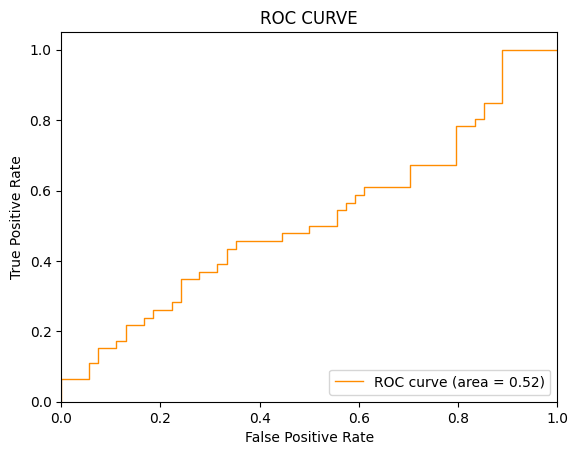

In [86]:
import numpy as np
import matplotlib.pyplot as plt
Y_test = np.random.randint(2, size=100)
y_pred = np.random.rand(100)
fpr, tpr, thresholds = roc_curve(Y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

<div class="alert alert-block alert-success">  
<h1><center><strong>Conclusion 📝</strong></center></h1>
    <p>
<li>We used the twitter sentiment analysis dataset and explored the data with different ways.</li>
        <li>We prepared the text data of tweets by removing the unnecessary things.</li>
          <li>We trained model based on tensorflow with all settings. </li>
        <li>We evaluated thye model with different evaluation measures.</li>
         <li>If you are interested to work on any text based project, you can simply apply the same methodolgy but might be you will need to change little settings like name of coloumns etc.</li>
        <li>We worked on the classification problem and sepcifically we call it binary classification which is two class classification.</li>
        </p>
</div>